<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
کنکلی
</font>
</h1>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه و صورت مسئله
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در این تمرین قصد داریم پیش‌بینی کنیم آیا کاربران بلیط خود را کنسل می‌کنند یا نه. به ازای هر کنسلی، مستربلیط باید به شرکت مسافربری جریمه پرداخت کند! پس بلیط‌های    کنسلی به معنی تحمیل هزینه به شرکت است. از این رو تشخیص دادن بلیط‌هایی که احتمال کنسلی آنان وجود دارد، به مدیریت ریسک شرکت کمک بزرگی می‌کند. 
    <br>
    حال از داده‌هایی که در اختیارتان قرار گرفته است استفاده کنید و مدلی آموزش دهید که کنسل شدن یا نشدن سفر را تشخیص دهد.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    ابتدا کتابخانه‌های مورد نیازتان را وارد کنید.
</font>
</p>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np 

from sklearn.preprocessing import LabelEncoder

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
مجموعه داده آموزشی شامل ۱۰۱۰۱۷ سطر است که در جدول زیر، توضیحات هر ستون آمده است.
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|Created|زمان ثبت بلیط|
|CancelTime|زمانی که مسافر بلیط را کنسل کرده است|
|DepartureTime|زمان حرکت|
|BillID|شناسه خرید|
|TicketID|شناسه بلیط|
|ReserveStatus|تعداد ماشین‌های گذرکرده|
|UserID|شناسه کاربری|
|Male|آیا بلیط متعلق به زن است یا مرد|
|Price|قیمت بلیط بدون تخفیف|
|CouponDiscount|تخفیفی که شخص روی بلیط اعمال کرده است|
|From|مبدا سفر|
|To|مقصد سفر|
|Domestic|آیا سفر، داخلی است یا خارجی|
|VehicleType|جزئیات وسیله نقلیه را مشخص می‌کند|
|VehicleClass|آیا وسیله نقلیه، فرست‌کلس است یا نه|
|Vehicle|نوع وسیله نقلیه|
|HashPassportNumber_p|هش‌شده شماره پاسپورت|
|HashEmail|هش‌شده ایمیل|
|BuyerMobile|هش‌شده شماره موبایل|
|NationalCode|هش‌شده شماره‌ملی|
|TripReason|دلیل سفر|
|Cancel|آیا بلیط کنسل شده‌است یا نه|
    
</font>
</div>
</center>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    مجموعه داده آزمایش نیز مانند مجموعه آموزش است با این تفاوت که ستون <code>Cancel</code> که متغیر هدف مسئله است را در خود ندارد. مجموعه داده آزمایش ۴۳۲۹۳ سطر دارد.
</font>
</p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خواندن مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در ابتدا نیاز است فایل‌های مجموعه‌داده را بخوانید. نمونه‌های آموزشی در فایل <code>train_data.csv</code> و نمونه‌های آزمون که باید دسته‌ی آن‌ها را پیش‌بینی کنید در فایل <code>test_data.csv</code> ذخیره شده‌اند. اگر لازم دانستید می‌توانید به دلخواه خود بخشی از مجموعه داده آموزشی را به عنوان مجموعه داده اعتبارسنجی نیز جدا کنید.
</font>
</p>

In [2]:
train_data = pd.read_csv('../data/train_data.csv')
train_data

,Created,CancelTime,DepartureTime,BillID,TicketID,ReserveStatus,UserID,Male,Price,CouponDiscount,...,Domestic,VehicleType,VehicleClass,TripReason,Vehicle,Cancel,HashPassportNumber_p,HashEmail,BuyerMobile,NationalCode
0,2022-07-26 13:33:20.457,NaN,2022-07-26 16:30:00,38428546,7445571.0,3,NaN,True,1180000.0,0.0,...,1,VIPمانیتوردار-شارژراختصاصی تخت شو مارال (جدید)...,True,Work,Bus,0,NaN,NaN,302222356019,330024570
1,2022-10-27 23:07:01.837,2022-10-27 23:26:39.070,2022-10-29 09:45:00,39768762,7762719.0,5,NaN,False,1050000.0,0.0,...,1,classicus 2+2,True,Int,Bus,1,NaN,NaN,900764168521,995520696
2,2022-09-12 11:01:13.607,NaN,2022-10-03 18:35:00,39128001,2327596.0,5,800398.0,False,4674000.0,0.0,...,1,فوکر 100,False,Int,Plane,0,NaN,1c44d7a76b52341fa12dcfa993138576befcc9ebf01d14...,749804783291,979382950
3,2022-08-08 17:43:35.840,NaN,2022-08-08 22:30:00,38606546,7495440.0,3,NaN,True,1200000.0,0.0,...,1,VIPدرسا+مانیتوردار+شارژراختصاصی+پذیرایی,True,Work,Bus,0,NaN,NaN,781396205677,911237229
4,2022-11-01 15:12:56.823,NaN,2022-11-03 11:30:00,39822185,2356902.0,5,NaN,True,6222000.0,0.0,...,1,NaN,False,Work,Plane,0,NaN,bb38b345aec02255e31d178492907175c5984f2a1f5b59...,524576220177,727496008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101012,2022-10-27 21:41:35.803,NaN,2022-11-05 20:15:00,39767774,3082282.0,2,NaN,False,7200000.0,0.0,...,1,5ستاره بيزينس سلامت فدك,NaN,Int,Train,0,NaN,NaN,395081863564,789320493
101013,2022-09-24 15:51:11.993,NaN,2022-10-21 09:15:00,39319207,3026516.0,2,151423.0,False,4292000.0,0.0,...,1,4ستاره4تخته سپهر,NaN,Int,Train,0,NaN,3f28ed65a16d629747e4d27fab100b2b082fcbdf7ec831...,130026405332,866503410
101014,2022-08-12 13:46:20.480,NaN,2022-08-12 23:59:00,38653461,7508988.0,3,NaN,True,1320000.0,0.0,...,1,VIP 2+1 / مانیتوردار / سیستم تهویه مطبوع / تخ...,True,Int,Bus,0,NaN,NaN,784949357488,881677039
101015,2022-06-20 15:15:37.780,NaN,2022-06-25 10:10:00,37880627,1057205.0,5,641744.0,True,13000000.0,0.0,...,1,NaN,False,Work,Plane,0,NaN,750690ca99468f159eff6ad928cec4339b089af8c2e6dc...,766602541733,403505466


In [3]:
test_data = pd.read_csv('../data/test_data.csv')
test_data

,Created,DepartureTime,BillID,TicketID,ReserveStatus,UserID,Male,Price,CouponDiscount,From,To,Domestic,VehicleType,VehicleClass,TripReason,Vehicle,HashPassportNumber_p,HashEmail,BuyerMobile,NationalCode
0,2022-07-08 12:04:46.290,2022-08-16 23:59:00,38166794,2890395.0,2,NaN,False,2043000.0,0.0,مشهد,تهران,1,3 ستاره 6 تخته پارسي,NaN,Int,Train,NaN,NaN,419509763088,660703096
1,2022-09-30 14:18:23.487,2022-09-30 23:59:00,39424175,7669420.0,3,NaN,False,1220000.0,0.0,تهران,اصفهان,1,V I P,True,Int,Bus,NaN,NaN,935955347521,960594437
2,2022-05-15 10:52:01.293,2022-06-06 17:40:00,37336619,2783057.0,2,800538.0,True,2132000.0,0.0,مشهد,تهران,1,4ستاره 4تخته سبز نوين,NaN,Int,Train,NaN,NaN,428059757595,854730165
3,2022-10-06 02:55:53.723,2022-10-14 19:45:00,39507715,7691289.0,5,950983.0,False,520000.0,0.0,تهران,سمنان,1,اسکانیا,True,Work,Bus,NaN,012dca1b2070c32e03238f49aa8f12a1a9ce580f8b1368...,515601565031,850531769
4,2022-03-12 13:46:40.300,2022-03-12 19:30:00,36422079,6901256.0,3,NaN,True,1180000.0,0.0,ارومیه,کرمانشاه,1,اسکانیا تک صندلی,True,Work,Bus,NaN,NaN,633910237635,893186872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43288,2022-09-25 15:33:09.793,2022-09-25 20:30:00,39338188,7647177.0,3,NaN,True,2480000.0,0.0,تهران,مشهد (خراسان ),1,وای پی تخت شو ۲۵نفره,True,Int,Bus,NaN,7091c8c24f3f57b98561de5d9a874cb91c3fd44371930a...,45595252975,158174797
43289,2022-07-16 19:58:15.300,2022-07-18 21:45:00,38298325,7406150.0,3,NaN,True,1330000.0,0.0,اصفهان,شیراز,1,اسکانیا درسا(مانیتور اختصاصی),True,Work,Bus,NaN,NaN,194871920550,384954737
43290,2022-06-16 18:14:40.673,2022-06-17 17:30:00,37823306,7274287.0,3,NaN,True,1290000.0,0.0,تهران,رودسر,1,مارال 25 نفره VIP,True,Int,Bus,NaN,NaN,687841588584,648554818
43291,2022-07-23 13:48:45.330,2022-08-23 21:05:00,38386540,2914007.0,2,724274.0,True,2810500.0,0.0,مشهد,تهران,1,4 ستاره 4 تخته غزال,NaN,Int,Train,NaN,a78e5ce63b34517a2c4e1d3ccd474241abe1993b49905c...,976918931561,779144272


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش و مهندسی ویژگی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در این سوال شما می‌توانید از هر تکنیک پیش‌پردازش/مهندسی ویژگی که در فصل‌های گذشته آموختید، استفاده کنید.
    <br>
    تکنیک‌هایی که استفاده می‌کنید به شکل مستقیم مورد ارزیابی توسط سامانه داوری قرار <b>نمی‌گیرند.</b> بلکه همه آن‌ها در دقت مدل شما تاثیر خواهند گذاشت؛ بنابراین هر چه پیش‌پردازش/مهندسی ویژگی بهتری انجام دهید تا دقت مدل بهبود پیدا کند، امتیاز بیشتری از این سوال کسب خواهید کرد.
</font>
</p>

In [4]:

import jdatetime

class Preprocessor  : 
    
    def __init__ (self) : 
    
        self.selected_cols = ['Created', 'DepartureTime', 'BillID', 'TicketID', 'ReserveStatus', \
                'Male', 'Price', 'CouponDiscount', 'From', 'To', 'Domestic',\
                'VehicleClass', 'Vehicle', 'Cancel', 'BuyerMobile', 'TripReason']
        
        self.final_features = ['ReserveStatus',
       'Male', 'Domestic', 'Vehicle', 'Cancel', 'TripReason',
       'TimeDiff', 'TicketPerOrder', 'is_with_familiy', 'net_price',
       'From_encoded', 'To_encoded', 'has_discount']
    
        self.target_col = 'Cancel'


    def to_jalali (self, gregorian_date) : 
        return jdatetime.datetime.fromgregorian(datetime = gregorian_date) 
    
    
    def is_family (self, rows) : 
        return True in rows.values and False in rows.values    

    def select_useful_cols (self, is_train) : 
        if is_train : 
            self.df = self.dataset[self.selected_cols]
        else : 
            test_useful_cols = self.selected_cols.copy()
            test_useful_cols.remove(self.target_col)
            self.df = self.dataset[test_useful_cols]
                        
        
         
    def handle_datetime_cols (self) : 
        self.df[['Created', 'DepartureTime']] = self.df[['Created', 'DepartureTime']].apply(pd.to_datetime)        
        self.df['TimeDiff'] = (self.df['DepartureTime'] - self.df['Created']).dt.days
        self.df.drop(['Created', 'DepartureTime'], axis=1, inplace=True)
            
        
    def extract_ticket_per_order (self) : 
        self.df['TicketPerOrder'] = self.df.groupby('BillID').TicketID.transform('count')
        
    def extract_is_with_family (self) : 
        self.df['is_with_familiy'] = self.df.groupby('BillID').Male.transform(self.is_family)
    
    
    def handle_monetary (self) : 
        self.df['net_price'] = self.df.Price - self.df.CouponDiscount
        self.df['net_price'] /= self.df['net_price'].max()
        self.df['has_discount'] = self.df.CouponDiscount > 0
        
        
    def encode_cities (self, is_train) : 
        if is_train : 
            cities = self.df.From.append(self.df.To).values 
            self.city_encoder = LabelEncoder().fit(cities)
        try : 
            city2idx = dict(zip(self.city_encoder.classes_, self.city_encoder.transform(self.city_encoder.classes_)))
            
            self.df['From_encoded'] = self.df.From.map(city2idx).fillna(-1).astype(int)
            self.df['To_encoded'] = self.df.To.map(city2idx).fillna(-1).astype(int)
            
            self.df.drop(['To', 'From'], axis=1, inplace=True)
        
        except KeyError as exc:  
            raise Exception('Something went wrong. Maybe this class is used for test date before fit on train data!')
            
            
    def encode_categorical_cols (self, is_train) : 
        if is_train : 
            self.cat_cols = self.df.select_dtypes(exclude=['int','float']).columns
            self.cat_les = {}

            for col in self.cat_cols : 
                le = LabelEncoder().fit(self.df[col])
                self.cat_les.update({col:le})
        
        try : 
            for col in self.cat_cols :
                if col == self.target_col :
                    continue
                self.df[col] = self.cat_les[col].transform(self.df[col])
        except Exception as exc: 
            raise Exception('Something went wrong. Maybe this class is used for test date before fit on train data!')

            
    def select_final_features (self, is_train) : 
        if is_train : 
            self.df = self.df[self.final_features]
        else : 
            test_final_cols = self.final_features.copy()
            test_final_cols.remove(self.target_col)
            self.df = self.df[test_final_cols]
            
        
    
    def transform(self, dataset:pd.DataFrame, is_train=True) : 
        self.dataset = dataset.copy()
        
        self.select_useful_cols(is_train)
        self.handle_datetime_cols()
        self.extract_ticket_per_order()
        self.extract_is_with_family()
        self.handle_monetary()
        self.encode_cities(is_train)
        self.encode_categorical_cols(is_train)
        self.select_final_features(is_train)
        
        return self.df

In [5]:
preprocessor = Preprocessor()
train_df = preprocessor.transform(train_data, is_train = True)

In [6]:
train_df

,ReserveStatus,Male,Domestic,Vehicle,Cancel,TripReason,TimeDiff,TicketPerOrder,is_with_familiy,net_price,From_encoded,To_encoded,has_discount
0,3,1,1,0,0,1,0,3,0,0.003075,178,163,0
1,5,0,1,0,1,0,1,5,0,0.002736,208,145,0
2,5,0,1,2,0,0,21,8,1,0.012179,82,22,0
3,3,1,1,0,0,1,0,1,0,0.003127,82,235,0
4,5,1,1,2,0,1,1,1,0,0.016213,283,82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101012,2,0,1,3,0,0,8,3,1,0.018762,231,82,0
101013,2,0,1,3,0,0,26,4,0,0.011184,231,32,0
101014,3,1,1,0,0,0,0,1,0,0.003440,178,32,0
101015,5,1,1,2,0,1,4,1,0,0.033875,82,139,0


In [7]:
test_df = preprocessor.transform(test_data, is_train=False)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل‌سازی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    حال که داده را پاکسازی کرده و احتمالا ویژگی‌هایی را به آن افزوده یا از آن حذف کرده‌اید، وقت آن است که مدلی آموزش دهید که بتواند متغیر هدف این مسئله را پیش‌بینی کند.
    <br>
    بر خلاف سایر تمرین‌های کالج، در این تمرین شما مجاز هستید از هر مدلی که آموخته‌اید استفاده کنید. به عبارت بهتر، هدف این سوال پیش‌بینی هرچه بهتر متغیر هدف مسئله است. انتظار ما این است که نحوه کار با کتابخانه‌های یادگیری ماشین را در حدی آموخته باشید که بتوانید با بهترین عملکرد، مسئله را حل کنید!
</font>
</p>

In [8]:
from sklearn.model_selection import train_test_split

target_col = 'Cancel'

x_train,x_test , y_train,y_test = train_test_split(train_df.drop(target_col,axis=1), train_df[target_col], test_size=.2,\
                                                   random_state=535, stratify=train_df[target_col])

In [9]:
from xgboost import XGBClassifier

model = XGBClassifier()

model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معیار ارزیابی
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    معیاری که برای ارزیابی عملکرد مدل انتخاب کرده‌ایم، <code>f1_score</code> نام دارد.
    <br>
    این معیار، سنجه ارزیابی کیفیت مدل شماست. به عبارت بهتر در سامانه داوری هم از همین معیار برای نمره‌دهی استفاده شده است.
    <br>
    پیشنهاد می‌شود با توجه به این معیار، عملکرد مدل خود را بر روی مجموعه داده آموزش یا اعتبارسنجی ارزیابی کنید.
</font>
</p>

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     17144
           1       0.99      0.89      0.94      3060

    accuracy                           0.98     20204
   macro avg       0.99      0.95      0.97     20204
weighted avg       0.98      0.98      0.98     20204



<AxesSubplot: >

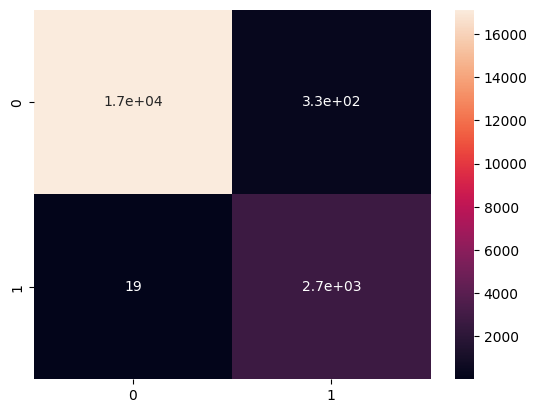

In [10]:
# evaluate model
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font color="red"><b color='red'>توجه:</b></font>
<font face="vazir" size=3>
 جهت کسب امتیاز کامل نیاز است تا پاسخ شما حداقل امتیاز <code>95%</code> را با توجه به معیار معرفی‌شده کسب نماید.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 پیش‌بینی برای داده تست و خروجی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    پس از مهندسی ویژگی و مدلسازی، الگوریتمی دارید که می‌تواند شما را از متغیرهای مستقل به متغیر هدف برساند.
    <br>
    از این مدل برای پیش‌بینی نمونه‌های موجود در داده تست استفاده کنید و نتایج را در قالب جدول (<code>dataframe</code>) زیر آماده کنید.
</font>
</p>

<div dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|------|---|
|Cancel|آیا بلیط کنسل می‌شود یا نه|
    
</font>
</div>



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    اسم دیتافریم باید <code>submission</code> باشد؛ در غیر این صورت، سامانه داوری نمی‌تواند تلاش‌ شما را ارزیابی کند.
    <br>
    این دیتافریم تنها شامل ۱ ستون با اسم <i>Cancel</i> است و ۴۳۲۹۳ سطر دارد.
    <br>
    به ازای هر سطر موجود در دیتافریم <i>test</i> شما باید یک مقدار پیشبینی شده داشته باشید.
    <br>
    جدول زیر، ۵ سطر ابتدایی دیتافریم <code>submission</code> را نشان می‌دهد. البته در جواب شما، مقادیر ستون <i>Cancel</i> ممکن است متفاوت باشد.
</font>
</p>

<div style="text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
||Cancel|
|----|-----|
|0|0|
|1|0|
|2|1|
|3|1|
|4|0|

</font>
</div>



In [11]:
# predict test samples
submission = model.predict(test_df)
submission = pd.DataFrame(submission, columns=['Cancel'])
submission


,Cancel
0,0
1,0
2,0
3,1
4,0
...,...
43288,0
43289,0
43290,0
43291,0


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [12]:
import zipfile
import joblib

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)
            
submission.to_csv('submission.csv', index=False)
file_names = ['canceli.ipynb', 'submission.csv']
compress(file_names)

File Paths:
['canceli.ipynb', 'submission.csv']
